In [1]:
import pandas as pd
import numpy as np
import scipy
import chaospy
import seaborn as sns
import sklearn
import keras
import plotnine
import altair
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('.\data\DataScienceCourse_EDPdata.csv', delimiter = ';')
dataset

Turbine_ID                  Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0             T01  2016-01-02T10:10:00+00:00        258.3        120.3   
1             T11  2016-01-02T10:20:00+00:00        282.3        221.0   
2             T11  2016-01-02T10:30:00+00:00       1391.5        242.8   
3             T09  2016-01-02T10:30:00+00:00       1398.4        231.2   
4             T01  2016-01-02T10:30:00+00:00       1428.7        217.3   
...           ...                        ...          ...          ...   
434140        T06  2017-08-23T09:10:00+00:00       1275.5       1235.4   
434141        T11  2017-08-23T09:30:00+00:00       1669.1       1222.2   
434142        T01  2017-08-23T09:30:00+00:00       1646.1       1220.8   
434143        T11  2017-08-23T09:40:00+00:00       1666.2       1216.2   
434144        T06  2017-08-23T09:40:00+00:00       1633.2       1213.8   

        Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0             195.4         41.4               30.0                   33   
1             248.8         17.0               28.0                   33   
2             582.2        444.5               28.0                   33   
3             735.4        496.5               28.0                   33   
4             927.5        463.3               30.0                   34   
...             ...          ...                ...                  ...   
434140       1251.2          6.7               49.0                   62   
434141       1426.8        118.2               59.0                   68   
434142       1348.6        118.5               46.0                   65   
434143       1397.9        117.5               59.0                   67   
434144       1341.9        103.0               49.0                   63   

        Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
0                        34                   33  ...                    0.0   
1                        33                   33  ...                    0.0   
2                        33                   33  ...                    0.0   
3                        33                   33  ...                    0.0   
4                        34                   34  ...                    0.0   
...                     ...                  ...  ...                    ...   
434140                   64                   64  ...                 -603.7   
434141                   68                   68  ...                 -849.7   
434142                   65                   65  ...                 -307.2   
434143                   68                   68  ...                 -680.5   
434144                   63                   64  ...                 -889.3   

        Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                      -992.0                  158.7                   40.6   
3                     -1000.0                  341.3                  167.1   
4                     -1000.0                  306.6                  336.9   
...                       ...                    ...                    ...   
434140                -1000.0                  123.1                  849.8   
434141                -1000.0                   11.3                  998.9   
434142                -1000.0                  207.7                  871.9   
434143                -1000.0                   48.3                  987.6   
434144                -1000.0                   14.1                  996.9   

        Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  \
0                         0.0                    0.0                    0.0   
1                         0.0                    0.0                    0.0   
2                       992.0                    0.0      

In [3]:
dataset.Timestamp = dataset.Timestamp.str.replace('\+00:00', '')

dataset.Timestamp = pd.to_datetime(dataset.Timestamp)
dataset.set_index('Timestamp', inplace=True)
dataset.sort_index(inplace=True)
dataset

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                   
2016-01-01        T09       1376.7       1234.3       1272.0         24.7   
2016-01-01        T06       1270.0       1232.8       1248.5          6.8   
2016-01-01        T01       1277.4       1226.1       1249.0          9.0   
2016-01-01        T07       1317.5       1229.5       1254.9         13.8   
2016-01-01        T11       1339.4       1233.3       1270.9         18.8   
...               ...          ...          ...          ...          ...   
2017-09-01        T11       1266.3       1234.3       1250.6          5.1   
2017-09-01        T01       1299.0       1222.1       1255.3         12.4   
2017-09-01        T09       1268.4       1240.1       1251.9          6.0   
2017-09-01        T06       1284.2       1233.4       1252.4          8.8   
2017-09-01        T07       1292.0       1232.5       1251.9          9.6   

            Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
Timestamp                                                                 
2016-01-01               40.0                   58                   57   
2016-01-01               42.0                   51                   52   
2016-01-01               41.0                   58                   59   
2016-01-01               41.0                   62                   62   
2016-01-01               42.0                   59                   61   
...                       ...                  ...                  ...   
2017-09-01               46.0                   60                   61   
2017-09-01               45.0                   64                   64   
2017-09-01               44.0                   62                   61   
2017-09-01               49.0                   63                   64   
2017-09-01               48.0                   66                   67   

            Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
Timestamp                                          ...                          
2016-01-01                   58                44  ...                 -224.5   
2016-01-01                   53                30  ...                    0.0   
2016-01-01                   58                30  ...                    0.0   
2016-01-01                   61                32  ...                    0.0   
2016-01-01                   60                30  ...                 -752.6   
...                         ...               ...  ...                    ...   
2017-09-01                   61                39  ...                 -524.4   
2017-09-01                   64                39  ...                 -314.2   
2017-09-01                   62                51  ...                 -340.3   
2017-09-01                   65                40  ...                 -171.8   
2017-09-01                   66                40  ...                 -745.0   

            Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  \
Timestamp                                                  
2016-01-01                -1000.0                  185.5   
2016-01-01                 -880.6                  180.0   
2016-01-01                 -584.5                  157.1   
2016-01-01                -1000.0                  338.9   
2016-01-01                -1000.0                   56.5   
...                           ...                    ...   
2017-09-01                -1000.0                  109.1   
2017-09-01                -1000.0                  203.6   
2017-09-01                -1000.0                  121.6   
2017-09-01                -1000.0                  272.2   
2017-09-01                -1000.0                   74.2   

            Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  \
Timestamp                                                  
2016-01-01                  861.6                 1000.0   
2016-01-01        

In [4]:
dataset.describe()

Gen_RPM_Max    Gen_RPM_Min    Gen_RPM_Avg    Gen_RPM_Std  \
count  434145.000000  434145.000000  434145.000000  434145.000000   
mean     1180.310084     923.317963    1055.186079      68.819458   
std       642.006443     614.935372     617.817715     112.115169   
min         0.000000       0.000000       0.000000       0.000000   
25%       303.700000     183.900000     261.400000      14.000000   
50%      1421.100000    1231.300000    1276.800000      28.500000   
75%      1681.900000    1369.400000    1592.300000      70.800000   
max      2040.900000    1672.000000    1684.400000     823.200000   

       Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
count      434138.000000        434145.000000        434145.000000   
mean           47.068879            64.429142            64.082938   
std            17.601409            28.603491            27.594479   
min            12.000000            14.000000            14.000000   
25%            35.000000            42.000000            42.000000   
50%            44.000000            60.000000            61.000000   
75%            57.000000            78.000000            77.000000   
max           205.000000           205.000000           205.000000   

       Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
count        434145.000000     434145.000000      434145.000000  ...   
mean             63.717733         37.775914          47.474406  ...   
std              27.174093          8.466287           7.102676  ...   
min              14.000000         20.000000          15.000000  ...   
25%              42.000000         30.000000          42.000000  ...   
50%              60.000000         37.000000          49.000000  ...   
75%              77.000000         46.000000          53.000000  ...   
max             205.000000         55.000000          65.000000  ...   

       Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  \
count          434145.000000          434145.000000          434145.000000   
mean             -368.445122            -674.827909              75.668842   
std               386.130033             441.406806              97.040909   
min             -1000.000000           -1000.000000               0.000000   
25%              -583.300000           -1000.000000               0.000000   
50%              -249.300000           -1000.000000              18.700000   
75%                 0.000000               0.000000             142.700000   
max               200.000000               0.000000             500.000000   

       Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  \
count          434145.000000          434145.000000          434145.000000   
mean              503.261352             662.075995             320.132837   
std               411.198363             438.854230             354.557765   
min                 0.000000               0.000000            -200.000000   
25%                 0.000000               0.000000               0.000000   
50%               501.300000            1000.000000             249.300000   
75%               961.300000            1000.000000             495.200000   
max              1000.000000            1000.000000            1000.000000   

       Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  Nac_Direction_Avg  \
count          434145.000000       434145.000000      434145.000000   
mean               82.694327           43.381573         185.173063   
std               100.024771           14.201787          94.590627   
min                 0.000000           13.000000           0.000000   
25%                 0.000000           33.000000         102.100000   
50%                32.400000           41.000000         164.500000   
75%               155.000000           53.000000         275.300000   
max               500.000000          205.000000         359.000000   

         Status_Flag  
count  434145.000000  
mean        0.7

In [5]:
dataset.keys()

Index(['Turbine_ID', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg', '

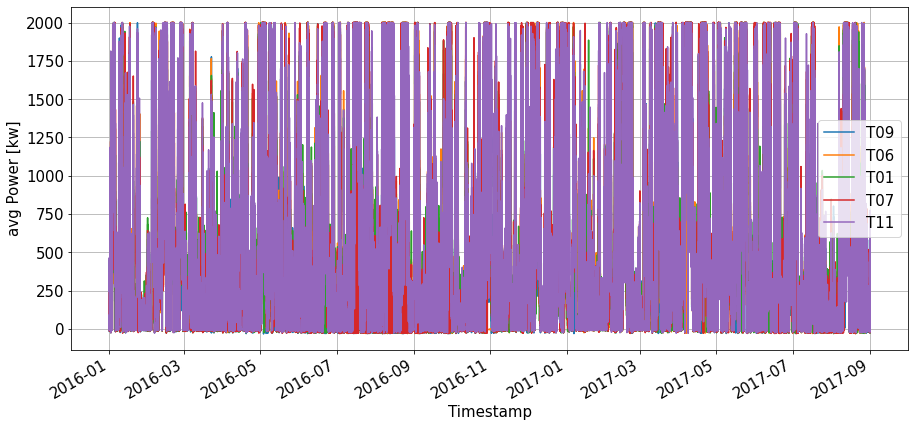

In [6]:
plt.rc('font', size=15) 
fig,ax = plt.subplots(figsize = (15,7))

for turbine in dataset.Turbine_ID.unique():
    dataset[dataset.Turbine_ID==turbine].Grd_Prod_Pwr_Avg.plot(label=turbine, ax=ax)
 
plt.ylabel('avg Power [kw]')
plt.grid()
plt.legend()
plt.show()

In [7]:
dataset_T09 = dataset[dataset.Turbine_ID == 'T09']
dataset_T09

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Timestamp                                                               
2016-01-01 00:00:00        T09       1376.7       1234.3       1272.0   
2016-01-01 00:10:00        T09       1485.0       1239.7       1321.4   
2016-01-01 00:20:00        T09       1441.0       1274.6       1363.4   
2016-01-01 00:30:00        T09       1549.4       1266.5       1379.7   
2016-01-01 00:40:00        T09       1536.5       1337.1       1426.9   
...                        ...          ...          ...          ...   
2017-08-31 23:20:00        T09       1262.6       1228.3       1249.6   
2017-08-31 23:30:00        T09       1263.4        250.9       1146.3   
2017-08-31 23:40:00        T09       1393.6        303.1       1176.0   
2017-08-31 23:50:00        T09       1272.6       1231.3       1249.3   
2017-09-01 00:00:00        T09       1268.4       1240.1       1251.9   

                     Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                                  
2016-01-01 00:00:00         24.7               40.0                   58   
2016-01-01 00:10:00         50.4               40.0                   58   
2016-01-01 00:20:00         31.0               40.0                   58   
2016-01-01 00:30:00         76.8               41.0                   59   
2016-01-01 00:40:00         42.0               41.0                   59   
...                          ...                ...                  ...   
2017-08-31 23:20:00          3.8               42.0                   60   
2017-08-31 23:30:00        290.2               43.0                   61   
2017-08-31 23:40:00        239.6               43.0                   60   
2017-08-31 23:50:00          6.4               43.0                   61   
2017-09-01 00:00:00          6.0               44.0                   62   

                     Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                       
2016-01-01 00:00:00                   57                   58   
2016-01-01 00:10:00                   57                   58   
2016-01-01 00:20:00                   57                   58   
2016-01-01 00:30:00                   58                   59   
2016-01-01 00:40:00                   58                   59   
...                                  ...                  ...   
2017-08-31 23:20:00                   59                   60   
2017-08-31 23:30:00                   60                   61   
2017-08-31 23:40:00                   59                   60   
2017-08-31 23:50:00                   60                   61   
2017-09-01 00:00:00                   61                   62   

                     Hyd_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
Timestamp                              ...                          
2016-01-01 00:00:00                44  ...                 -224.5   
2016-01-01 00:10:00                44  ...                 -293.3   
2016-01-01 00:20:00                44  ...                 -904.9   
2016-01-01 00:30:00                44  ...                -1000.0   
2016-01-01 00:40:00                44  ...                 -730.8   
...                               ...  ...                    ...   
2017-08-31 23:20:00                51  ...                 -318.9   
2017-08-31 23:30:00                51  ...                    0.0   
2017-08-31 23:40:00                51  ...                    0.0   
2017-08-31 23:50:00                51  ...                    0.0   
2017-09-01 00:00:00                51  ...                 -340.3   

                     Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  \
Timestamp                                                           
2016-01-01 00:00:00                -1000.0                  185.5   
2016-01-01 00:10:00                -1000.0                  227.4   
2016-01-01 00:20:00                -1000.0                   

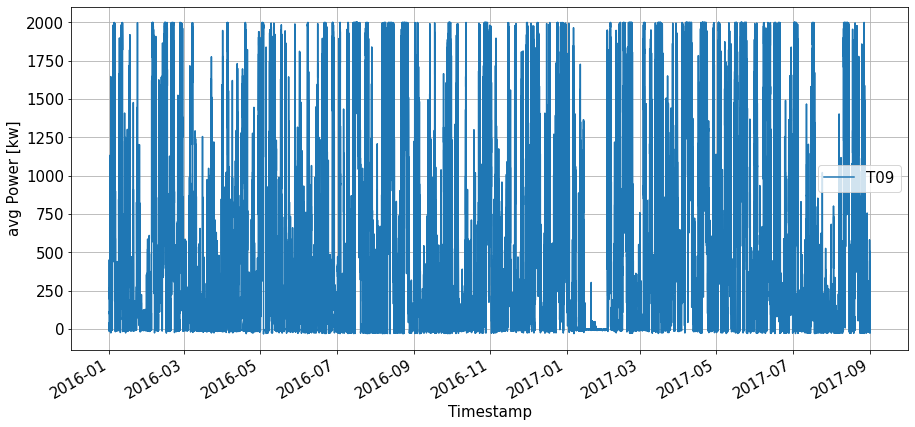

In [8]:
plt.rc('font', size=15) 
fig,ax = plt.subplots(figsize = (15,7))


dataset[dataset.Turbine_ID == "T09"].Grd_Prod_Pwr_Avg.plot(label="T09", ax=ax)
 
plt.ylabel('avg Power [kw]')
plt.grid()
plt.legend()
plt.show()

In [9]:
print('Null values: ', dataset_T09.isnull().sum())

missing_time_stamps = pd.date_range(start=dataset_T09.index[0],
                                    end=dataset_T09.index[-1], 
                                    freq='10min').difference(dataset_T09.index)

print('Missing time stamps ', missing_time_stamps)

Null values:  Turbine_ID               0
Gen_RPM_Max              0
Gen_RPM_Min              0
Gen_RPM_Avg              0
Gen_RPM_Std              0
                        ..
Grd_Prod_PsbleCap_Min    0
Grd_Prod_PsbleCap_Std    0
Gen_Bear2_Temp_Avg       0
Nac_Direction_Avg        0
Status_Flag              0
Length: 83, dtype: int64
Missing time stamps  DatetimeIndex(['2016-03-02 09:40:00', '2016-03-02 11:00:00',
               '2016-03-02 13:10:00', '2016-03-02 14:00:00',
               '2016-03-02 14:10:00', '2016-03-02 14:20:00',
               '2016-03-02 14:30:00', '2016-03-27 02:00:00',
               '2016-03-27 02:10:00', '2016-03-27 02:20:00',
               ...
               '2017-07-06 19:30:00', '2017-07-06 19:40:00',
               '2017-07-06 19:50:00', '2017-07-06 20:00:00',
               '2017-07-06 20:10:00', '2017-07-06 20:20:00',
               '2017-07-06 20:30:00', '2017-08-17 12:30:00',
               '2017-08-17 12:40:00', '2017-08-17 12:50:00'],
             

In [10]:
sampling_rate = '10min' 
dataset_T09_cont = dataset_T09.resample(sampling_rate).asfreq()
dataset_T09_cont.loc[missing_time_stamps]

ValueError: cannot reindex from a duplicate axis

In [11]:
dataset_T06 = dataset[dataset.Turbine_ID == "T06"]
dataset_T06

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Timestamp                                                               
2016-01-01 00:00:00        T06       1270.0       1232.8       1248.5   
2016-01-01 00:10:00        T06       1429.7        203.9       1154.1   
2016-01-01 00:20:00        T06       1360.5        250.3       1041.4   
2016-01-01 00:30:00        T06       1399.2       1228.8       1252.5   
2016-01-01 00:40:00        T06       1302.7       1225.1       1257.6   
...                        ...          ...          ...          ...   
2017-08-31 23:20:00        T06       1407.0       1233.1       1284.4   
2017-08-31 23:30:00        T06       1322.3       1226.3       1258.8   
2017-08-31 23:40:00        T06       1287.2       1228.4       1251.3   
2017-08-31 23:50:00        T06       1273.5       1227.8       1249.7   
2017-09-01 00:00:00        T06       1284.2       1233.4       1252.4   

                     Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                                  
2016-01-01 00:00:00          6.8               42.0                   51   
2016-01-01 00:10:00        271.7               42.0                   51   
2016-01-01 00:20:00        382.7               42.0                   50   
2016-01-01 00:30:00         16.5               42.0                   49   
2016-01-01 00:40:00         13.4               41.0                   50   
...                          ...                ...                  ...   
2017-08-31 23:20:00         46.2               47.0                   60   
2017-08-31 23:30:00         18.8               48.0                   61   
2017-08-31 23:40:00          8.8               48.0                   62   
2017-08-31 23:50:00          8.8               49.0                   62   
2017-09-01 00:00:00          8.8               49.0                   63   

                     Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                       
2016-01-01 00:00:00                   52                   53   
2016-01-01 00:10:00                   52                   52   
2016-01-01 00:20:00                   51                   51   
2016-01-01 00:30:00                   50                   50   
2016-01-01 00:40:00                   50                   51   
...                                  ...                  ...   
2017-08-31 23:20:00                   61                   61   
2017-08-31 23:30:00                   62                   62   
2017-08-31 23:40:00                   63                   63   
2017-08-31 23:50:00                   64                   64   
2017-09-01 00:00:00                   64                   65   

                     Hyd_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
Timestamp                              ...                          
2016-01-01 00:00:00                30  ...                    0.0   
2016-01-01 00:10:00                30  ...                    0.0   
2016-01-01 00:20:00                31  ...                    0.0   
2016-01-01 00:30:00                31  ...                    0.0   
2016-01-01 00:40:00                31  ...                 -556.0   
...                               ...  ...                    ...   
2017-08-31 23:20:00                40  ...                 -926.8   
2017-08-31 23:30:00                40  ...                 -588.6   
2017-08-31 23:40:00                40  ...                 -453.5   
2017-08-31 23:50:00                40  ...                 -133.6   
2017-09-01 00:00:00                40  ...                 -171.8   

                     Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  \
Timestamp                                                           
2016-01-01 00:00:00                 -880.6                  180.0   
2016-01-01 00:10:00                -1000.0                  154.1   
2016-01-01 00:20:00                 -587.9                  1

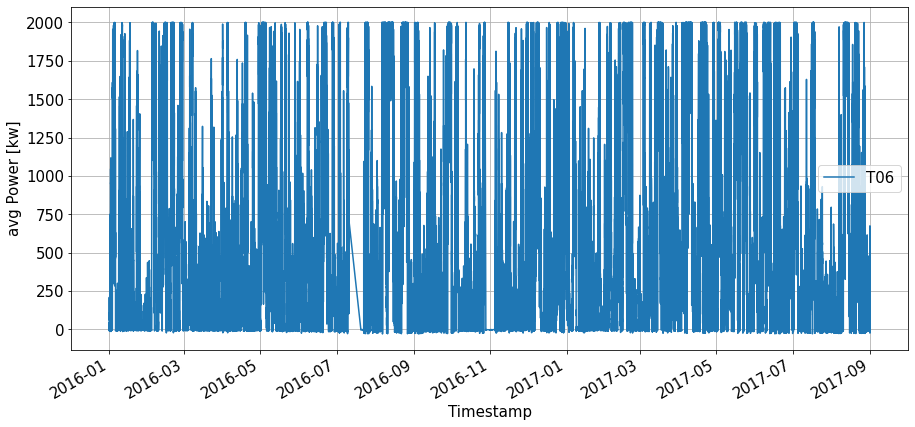

In [12]:
plt.rc('font', size=15) 
fig,ax = plt.subplots(figsize = (15,7))


dataset[dataset.Turbine_ID == "T06"].Grd_Prod_Pwr_Avg.plot(label="T06", ax=ax)
 
plt.ylabel('avg Power [kw]')
plt.grid()
plt.legend()
plt.show()

In [13]:
dataset_T01 = dataset[dataset.Turbine_ID == "T01"]
dataset_T01

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Timestamp                                                               
2016-01-01 00:00:00        T01       1277.4       1226.1       1249.0   
2016-01-01 00:10:00        T01       1268.3         93.3        999.7   
2016-01-01 00:20:00        T01       1394.4        220.3        774.0   
2016-01-01 00:30:00        T01       1306.6       1212.4       1257.1   
2016-01-01 00:40:00        T01       1320.9       1224.1       1257.7   
...                        ...          ...          ...          ...   
2017-08-31 23:20:00        T01       1279.2       1226.6       1249.4   
2017-08-31 23:30:00        T01       1277.0       1224.9       1249.2   
2017-08-31 23:40:00        T01       1269.5       1237.2       1249.2   
2017-08-31 23:50:00        T01       1267.3       1230.6       1249.7   
2017-09-01 00:00:00        T01       1299.0       1222.1       1255.3   

                     Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                                  
2016-01-01 00:00:00          9.0               41.0                   58   
2016-01-01 00:10:00        435.9               41.0                   58   
2016-01-01 00:20:00        486.1               41.0                   57   
2016-01-01 00:30:00         17.0               40.0                   56   
2016-01-01 00:40:00         18.0               40.0                   57   
...                          ...                ...                  ...   
2017-08-31 23:20:00          9.5               43.0                   59   
2017-08-31 23:30:00         10.1               43.0                   61   
2017-08-31 23:40:00          5.2               44.0                   62   
2017-08-31 23:50:00          7.5               45.0                   63   
2017-09-01 00:00:00         12.4               45.0                   64   

                     Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                       
2016-01-01 00:00:00                   59                   58   
2016-01-01 00:10:00                   59                   59   
2016-01-01 00:20:00                   57                   57   
2016-01-01 00:30:00                   57                   57   
2016-01-01 00:40:00                   58                   57   
...                                  ...                  ...   
2017-08-31 23:20:00                   60                   59   
2017-08-31 23:30:00                   61                   61   
2017-08-31 23:40:00                   62                   62   
2017-08-31 23:50:00                   63                   63   
2017-09-01 00:00:00                   64                   64   

                     Hyd_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
Timestamp                              ...                          
2016-01-01 00:00:00                30  ...                    0.0   
2016-01-01 00:10:00                30  ...                    0.0   
2016-01-01 00:20:00                30  ...                    0.0   
2016-01-01 00:30:00                30  ...                    0.0   
2016-01-01 00:40:00                30  ...                    0.0   
...                               ...  ...                    ...   
2017-08-31 23:20:00                40  ...                    0.0   
2017-08-31 23:30:00                40  ...                    0.0   
2017-08-31 23:40:00                39  ...                    0.0   
2017-08-31 23:50:00                39  ...                   -9.6   
2017-09-01 00:00:00                39  ...                 -314.2   

                     Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  \
Timestamp                                                           
2016-01-01 00:00:00                 -584.5                  157.1   
2016-01-01 00:10:00                 -501.0                  123.7   
2016-01-01 00:20:00                -1000.0                  3

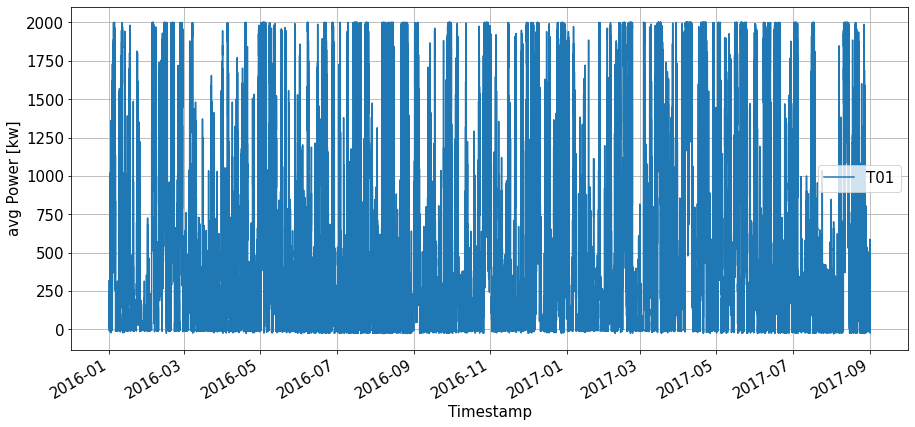

In [14]:
plt.rc('font', size=15) 
fig,ax = plt.subplots(figsize = (15,7))


dataset[dataset.Turbine_ID == "T01"].Grd_Prod_Pwr_Avg.plot(label="T01", ax=ax)
 
plt.ylabel('avg Power [kw]')
plt.grid()
plt.legend()
plt.show()

In [15]:
dataset_T07 = dataset[dataset.Turbine_ID == "T07"]
dataset_T07

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Timestamp                                                               
2016-01-01 00:00:00        T07       1317.5       1229.5       1254.9   
2016-01-01 00:10:00        T07       1271.1       1233.4       1251.9   
2016-01-01 00:20:00        T07       1276.7       1229.1       1251.1   
2016-01-01 00:30:00        T07       1408.5       1227.0       1259.9   
2016-01-01 00:40:00        T07       1366.1       1236.5       1288.2   
...                        ...          ...          ...          ...   
2017-08-31 23:20:00        T07       1277.9       1227.3       1250.0   
2017-08-31 23:30:00        T07       1276.7       1231.1       1251.8   
2017-08-31 23:40:00        T07       1275.5       1229.0       1250.7   
2017-08-31 23:50:00        T07       1347.6       1233.0       1253.0   
2017-09-01 00:00:00        T07       1292.0       1232.5       1251.9   

                     Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                                  
2016-01-01 00:00:00         13.8               41.0                   62   
2016-01-01 00:10:00          7.1               42.0                   62   
2016-01-01 00:20:00          9.5               42.0                   62   
2016-01-01 00:30:00         25.4               42.0                   63   
2016-01-01 00:40:00         32.8               42.0                   63   
...                          ...                ...                  ...   
2017-08-31 23:20:00          8.6               48.0                   64   
2017-08-31 23:30:00          8.0               48.0                   65   
2017-08-31 23:40:00          7.9               48.0                   65   
2017-08-31 23:50:00         12.6               48.0                   66   
2017-09-01 00:00:00          9.6               48.0                   66   

                     Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                       
2016-01-01 00:00:00                   62                   61   
2016-01-01 00:10:00                   62                   62   
2016-01-01 00:20:00                   62                   62   
2016-01-01 00:30:00                   62                   62   
2016-01-01 00:40:00                   63                   63   
...                                  ...                  ...   
2017-08-31 23:20:00                   64                   64   
2017-08-31 23:30:00                   65                   65   
2017-08-31 23:40:00                   65                   65   
2017-08-31 23:50:00                   66                   66   
2017-09-01 00:00:00                   67                   66   

                     Hyd_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
Timestamp                              ...                          
2016-01-01 00:00:00                32  ...                    0.0   
2016-01-01 00:10:00                32  ...                    0.0   
2016-01-01 00:20:00                32  ...                  -62.2   
2016-01-01 00:30:00                32  ...                 -147.7   
2016-01-01 00:40:00                32  ...                 -908.9   
...                               ...  ...                    ...   
2017-08-31 23:20:00                41  ...                 -729.1   
2017-08-31 23:30:00                41  ...                 -514.5   
2017-08-31 23:40:00                41  ...                  -99.6   
2017-08-31 23:50:00                41  ...                 -689.5   
2017-09-01 00:00:00                40  ...                 -745.0   

                     Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  \
Timestamp                                                           
2016-01-01 00:00:00                -1000.0                  338.9   
2016-01-01 00:10:00                 -763.5                  180.8   
2016-01-01 00:20:00                -1000.0                  2

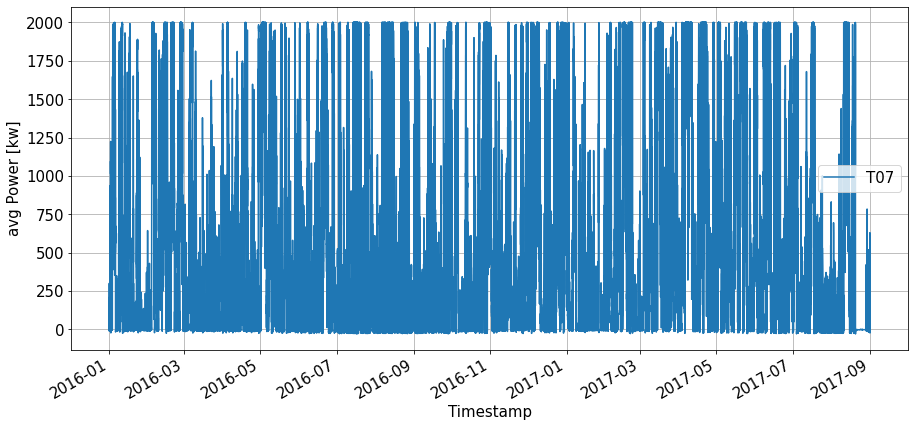

In [16]:
plt.rc('font', size=15) 
fig,ax = plt.subplots(figsize = (15,7))


dataset[dataset.Turbine_ID == "T07"].Grd_Prod_Pwr_Avg.plot(label="T07", ax=ax)
 
plt.ylabel('avg Power [kw]')
plt.grid()
plt.legend()
plt.show()

In [17]:
dataset_T11 = dataset[dataset.Turbine_ID == "T11"]
dataset_T11

Turbine_ID  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Timestamp                                                               
2016-01-01 00:00:00        T11       1339.4       1233.3       1270.9   
2016-01-01 00:10:00        T11       1400.5       1239.8       1303.6   
2016-01-01 00:20:00        T11       1423.6       1270.8       1344.3   
2016-01-01 00:30:00        T11       1470.1       1258.7       1377.5   
2016-01-01 00:40:00        T11       1539.1       1252.1       1396.2   
...                        ...          ...          ...          ...   
2017-08-31 23:20:00        T11       1434.3       1243.1       1286.1   
2017-08-31 23:30:00        T11       1265.2       1238.6       1249.8   
2017-08-31 23:40:00        T11       1264.6       1235.1       1248.8   
2017-08-31 23:50:00        T11       1281.4       1231.9       1250.5   
2017-09-01 00:00:00        T11       1266.3       1234.3       1250.6   

                     Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                                  
2016-01-01 00:00:00         18.8               42.0                   59   
2016-01-01 00:10:00         40.2               43.0                   59   
2016-01-01 00:20:00         27.2               43.0                   60   
2016-01-01 00:30:00         48.9               43.0                   60   
2016-01-01 00:40:00         66.8               43.0                   61   
...                          ...                ...                  ...   
2017-08-31 23:20:00         46.8               43.0                   56   
2017-08-31 23:30:00          4.1               43.0                   57   
2017-08-31 23:40:00          4.7               44.0                   58   
2017-08-31 23:50:00          6.3               45.0                   59   
2017-09-01 00:00:00          5.1               46.0                   60   

                     Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                       
2016-01-01 00:00:00                   61                   60   
2016-01-01 00:10:00                   61                   60   
2016-01-01 00:20:00                   61                   61   
2016-01-01 00:30:00                   62                   61   
2016-01-01 00:40:00                   62                   61   
...                                  ...                  ...   
2017-08-31 23:20:00                   57                   56   
2017-08-31 23:30:00                   58                   58   
2017-08-31 23:40:00                   59                   59   
2017-08-31 23:50:00                   60                   60   
2017-09-01 00:00:00                   61                   61   

                     Hyd_Oil_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
Timestamp                              ...                          
2016-01-01 00:00:00                30  ...                 -752.6   
2016-01-01 00:10:00                30  ...                 -931.3   
2016-01-01 00:20:00                30  ...                 -986.9   
2016-01-01 00:30:00                30  ...                -1000.0   
2016-01-01 00:40:00                30  ...                 -945.9   
...                               ...  ...                    ...   
2017-08-31 23:20:00                40  ...                 -887.5   
2017-08-31 23:30:00                40  ...                 -356.0   
2017-08-31 23:40:00                40  ...                 -135.3   
2017-08-31 23:50:00                40  ...                 -243.3   
2017-09-01 00:00:00                39  ...                 -524.4   

                     Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  \
Timestamp                                                           
2016-01-01 00:00:00                -1000.0                   56.5   
2016-01-01 00:10:00                -1000.0                    5.8   
2016-01-01 00:20:00                -1000.0                   

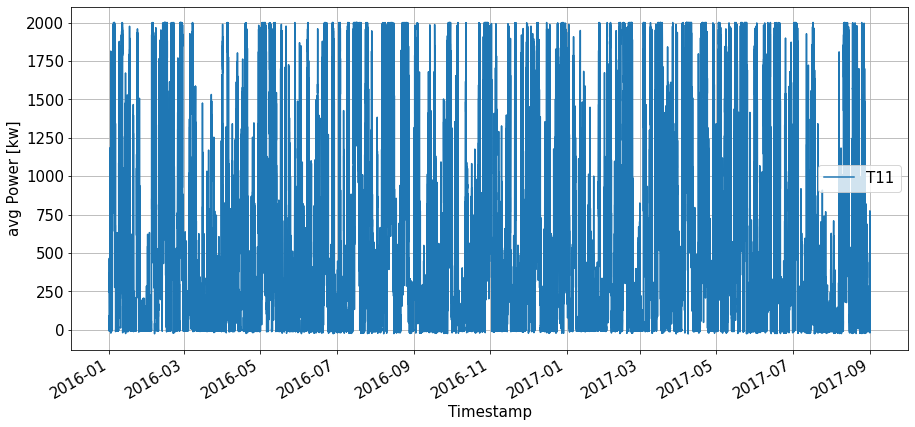

In [18]:
plt.rc('font', size=15) 
fig,ax = plt.subplots(figsize = (15,7))


dataset[dataset.Turbine_ID == "T11"].Grd_Prod_Pwr_Avg.plot(label="T11", ax=ax)
 
plt.ylabel('avg Power [kw]')
plt.grid()
plt.legend()
plt.show()

In [19]:
len(dataset_T09)

87156

In [20]:
len(dataset_T06)

85388

In [21]:
len(dataset_T01)

87146

In [22]:
len(dataset_T07)

87207

In [23]:
len(dataset_T11)

87248

In [24]:
dataset_power = dataset[['Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Min', 'Grd_Prod_Pwr_Max']].groupby(level=0).sum()
dataset_power['Grd_Prod_Pwr_Std'] = np.sqrt((dataset['Grd_Prod_Pwr_Std']**2).groupby(level=0).sum())
dataset_power

Grd_Prod_Pwr_Avg  Grd_Prod_Pwr_Min  Grd_Prod_Pwr_Max  \
Timestamp                                                                   
2016-01-01 00:00:00             645.9             137.3            1292.0   
2016-01-01 00:10:00             650.3             179.8            1382.5   
2016-01-01 00:20:00             843.1             353.1            1466.7   
2016-01-01 00:30:00            1234.1             497.9            2033.3   
2016-01-01 00:40:00            1363.9             628.2            2142.1   
...                               ...               ...               ...   
2017-08-31 23:20:00            1104.8             580.2            1766.2   
2017-08-31 23:30:00             720.0             265.5            1245.7   
2017-08-31 23:40:00             505.0              86.8            1183.2   
2017-08-31 23:50:00             638.9             209.1            1346.2   
2017-09-01 00:00:00             935.5             421.8            1445.5   

                     Grd_Prod_Pwr_Std  
Timestamp                              
2016-01-01 00:00:00        121.107308  
2016-01-01 00:10:00        119.110579  
2016-01-01 00:20:00        115.687986  
2016-01-01 00:30:00        149.047778  
2016-01-01 00:40:00        154.499773  
...                               ...  
2017-08-31 23:20:00        138.041805  
2017-08-31 23:30:00        112.564382  
2017-08-31 23:40:00        127.530114  
2017-08-31 23:50:00        111.351471  
2017-09-01 00:00:00        114.206786  

[87342 rows x 4 columns]

In [25]:
dataset_power.describe()

Grd_Prod_Pwr_Avg  Grd_Prod_Pwr_Min  Grd_Prod_Pwr_Max  Grd_Prod_Pwr_Std
count      87342.000000      87342.000000      87342.000000      87342.000000
mean        2673.851206       1540.870046       3768.992150        230.834413
std         3164.097678       2353.302093       3800.848916        224.547104
min         -135.300000       -255.100000       -122.600000          3.346640
25%           15.525000       -118.500000        269.000000         34.940055
50%         1215.550000        387.150000       2327.750000        163.567601
75%         4685.250000       2400.700000       7073.500000        375.507090
max        14622.100000      11019.700000      16813.000000       1848.985733

Text(0.5, 0, 'Time')

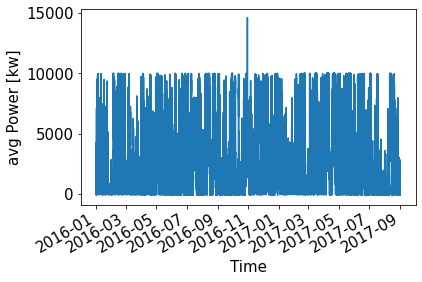

In [26]:
dataset_power.Grd_Prod_Pwr_Avg.plot()
plt.ylabel('avg Power [kw]')
plt.xlabel('Time')

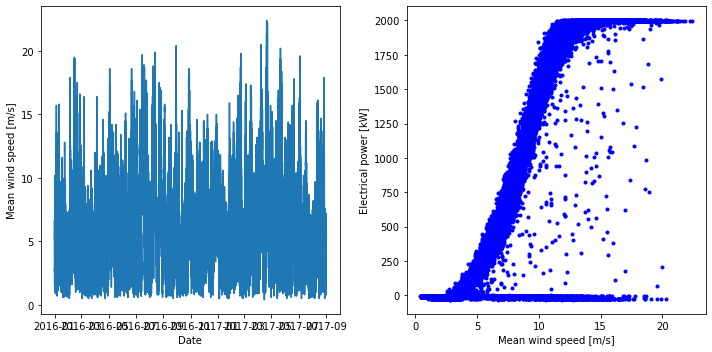

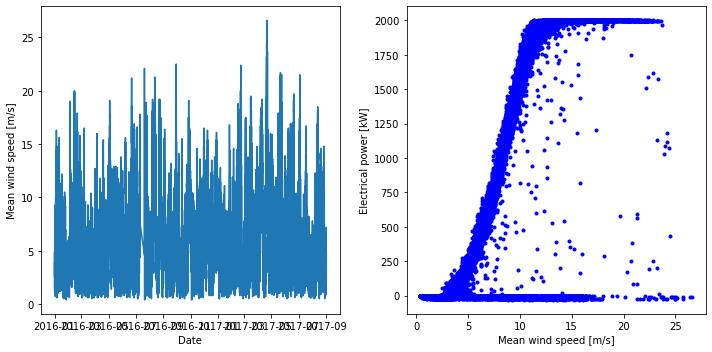

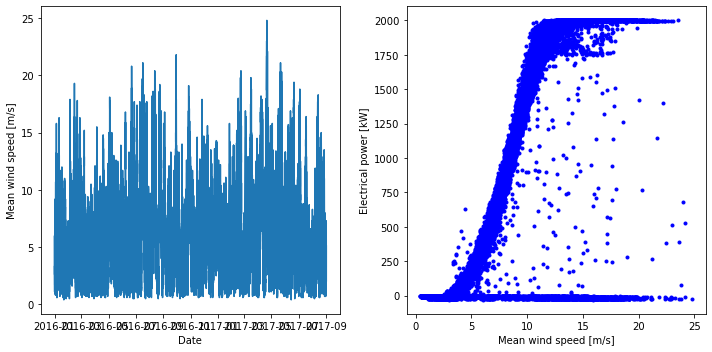

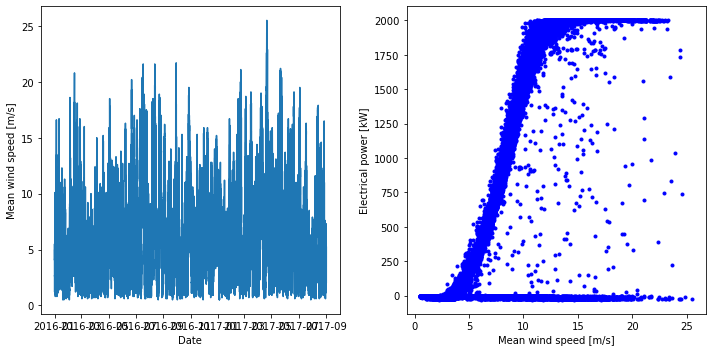

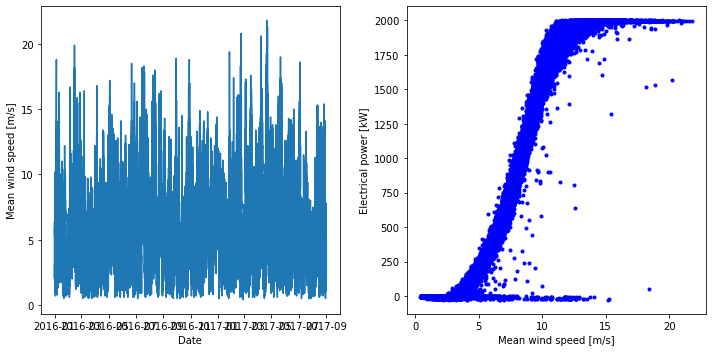

In [27]:
plt.rc('font', size=10) 
fig2,axs2 = plt.subplots(1,2,figsize = (10,5))
axs2[0].plot(dataset.index[dataset.Turbine_ID=='T09'],dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T09'])
plt.setp(axs2[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
axs2[1].plot(dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T09'],dataset.Grd_Prod_Pwr_Avg[dataset.Turbine_ID=='T09'],'.b')
plt.setp(axs2[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

plt.rc('font', size=10) 
fig2,axs2 = plt.subplots(1,2,figsize = (10,5))
axs2[0].plot(dataset.index[dataset.Turbine_ID=='T06'],dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T06'])
plt.setp(axs2[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
axs2[1].plot(dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T06'],dataset.Grd_Prod_Pwr_Avg[dataset.Turbine_ID=='T06'],'.b')
plt.setp(axs2[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

plt.rc('font', size=10) 
fig2,axs2 = plt.subplots(1,2,figsize = (10,5))
axs2[0].plot(dataset.index[dataset.Turbine_ID=='T01'],dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T01'])
plt.setp(axs2[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
axs2[1].plot(dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T01'],dataset.Grd_Prod_Pwr_Avg[dataset.Turbine_ID=='T01'],'.b')
plt.setp(axs2[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

plt.rc('font', size=10) 
fig2,axs2 = plt.subplots(1,2,figsize = (10,5))
axs2[0].plot(dataset.index[dataset.Turbine_ID=='T07'],dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T07'])
plt.setp(axs2[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
axs2[1].plot(dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T07'],dataset.Grd_Prod_Pwr_Avg[dataset.Turbine_ID=='T07'],'.b')
plt.setp(axs2[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

plt.rc('font', size=10) 
fig2,axs2 = plt.subplots(1,2,figsize = (10,5))
axs2[0].plot(dataset.index[dataset.Turbine_ID=='T11'],dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T11'])
plt.setp(axs2[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
axs2[1].plot(dataset.Amb_WindSpeed_Avg[dataset.Turbine_ID=='T11'],dataset.Grd_Prod_Pwr_Avg[dataset.Turbine_ID=='T11'],'.b')
plt.setp(axs2[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

In [28]:
T01mask = dataset.Turbine_ID == 'T01'

MaxPowerMask = dataset.Grd_Prod_Pwr_Max >= 1
MinPowerMask = dataset.Grd_Prod_Pwr_Min <= 1
MinRPMMask = dataset.Gen_RPM_Min >= 1150
MaxRPMMask = dataset.Gen_RPM_Max >= 1250

OperationalMask = MinRPMMask & ~MinPowerMask
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

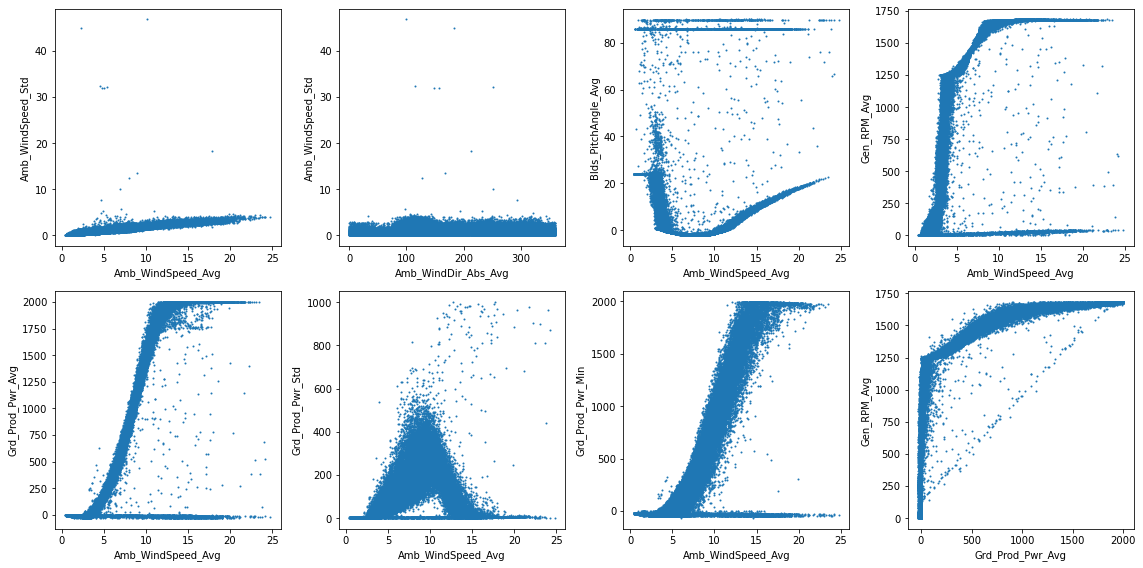

In [29]:
plt.rc('font', size=10) 
fig3 = plt.figure(figsize = (16,8))
fig3.add_subplot(2,4,1)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,2)
plt.plot(dataset.Amb_WindDir_Abs_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindDir_Abs_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,3)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Blds_PitchAngle_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Blds_PitchAngle_Avg')
fig3.add_subplot(2,4,4)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Gen_RPM_Avg')
fig3.add_subplot(2,4,5)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
fig3.add_subplot(2,4,6)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Std')
fig3.add_subplot(2,4,7)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Min[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Min')
fig3.add_subplot(2,4,8)
plt.plot(dataset.Grd_Prod_Pwr_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Grd_Prod_Pwr_Avg')
plt.ylabel('Gen_RPM_Avg')


plt.tight_layout()             
plt.show()

In [30]:
T01mask = dataset.Turbine_ID == 'T09'

MaxPowerMask = dataset.Grd_Prod_Pwr_Max >= 1
MinPowerMask = dataset.Grd_Prod_Pwr_Min <= 1
MinRPMMask = dataset.Gen_RPM_Min >= 1150
MaxRPMMask = dataset.Gen_RPM_Max >= 1250

OperationalMask = MinRPMMask & ~MinPowerMask
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

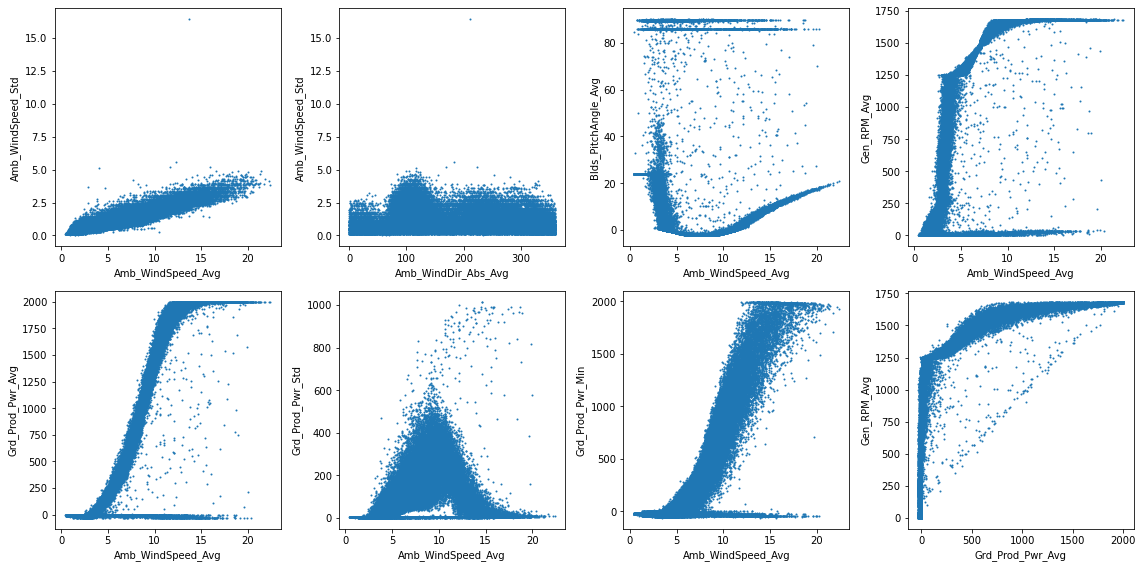

In [31]:
plt.rc('font', size=10) 
fig3 = plt.figure(figsize = (16,8))
fig3.add_subplot(2,4,1)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,2)
plt.plot(dataset.Amb_WindDir_Abs_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindDir_Abs_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,3)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Blds_PitchAngle_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Blds_PitchAngle_Avg')
fig3.add_subplot(2,4,4)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Gen_RPM_Avg')
fig3.add_subplot(2,4,5)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
fig3.add_subplot(2,4,6)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Std')
fig3.add_subplot(2,4,7)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Min[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Min')
fig3.add_subplot(2,4,8)
plt.plot(dataset.Grd_Prod_Pwr_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Grd_Prod_Pwr_Avg')
plt.ylabel('Gen_RPM_Avg')


plt.tight_layout()             
plt.show()

In [32]:
T01mask = dataset.Turbine_ID == 'T07'

MaxPowerMask = dataset.Grd_Prod_Pwr_Max >= 1
MinPowerMask = dataset.Grd_Prod_Pwr_Min <= 1
MinRPMMask = dataset.Gen_RPM_Min >= 1150
MaxRPMMask = dataset.Gen_RPM_Max >= 1250

OperationalMask = MinRPMMask & ~MinPowerMask
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

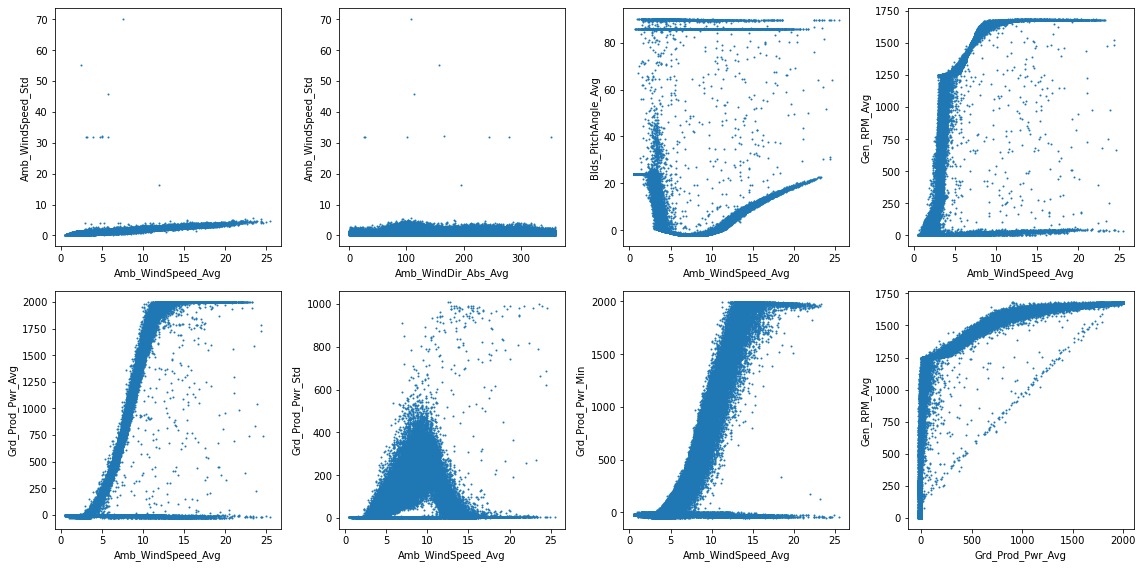

In [33]:
plt.rc('font', size=10) 
fig3 = plt.figure(figsize = (16,8))
fig3.add_subplot(2,4,1)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,2)
plt.plot(dataset.Amb_WindDir_Abs_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindDir_Abs_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,3)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Blds_PitchAngle_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Blds_PitchAngle_Avg')
fig3.add_subplot(2,4,4)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Gen_RPM_Avg')
fig3.add_subplot(2,4,5)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
fig3.add_subplot(2,4,6)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Std')
fig3.add_subplot(2,4,7)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Min[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Min')
fig3.add_subplot(2,4,8)
plt.plot(dataset.Grd_Prod_Pwr_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Grd_Prod_Pwr_Avg')
plt.ylabel('Gen_RPM_Avg')


plt.tight_layout()             
plt.show()

In [34]:
T01mask = dataset.Turbine_ID == 'T06'

MaxPowerMask = dataset.Grd_Prod_Pwr_Max >= 1
MinPowerMask = dataset.Grd_Prod_Pwr_Min <= 1
MinRPMMask = dataset.Gen_RPM_Min >= 1150
MaxRPMMask = dataset.Gen_RPM_Max >= 1250

OperationalMask = MinRPMMask & ~MinPowerMask
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

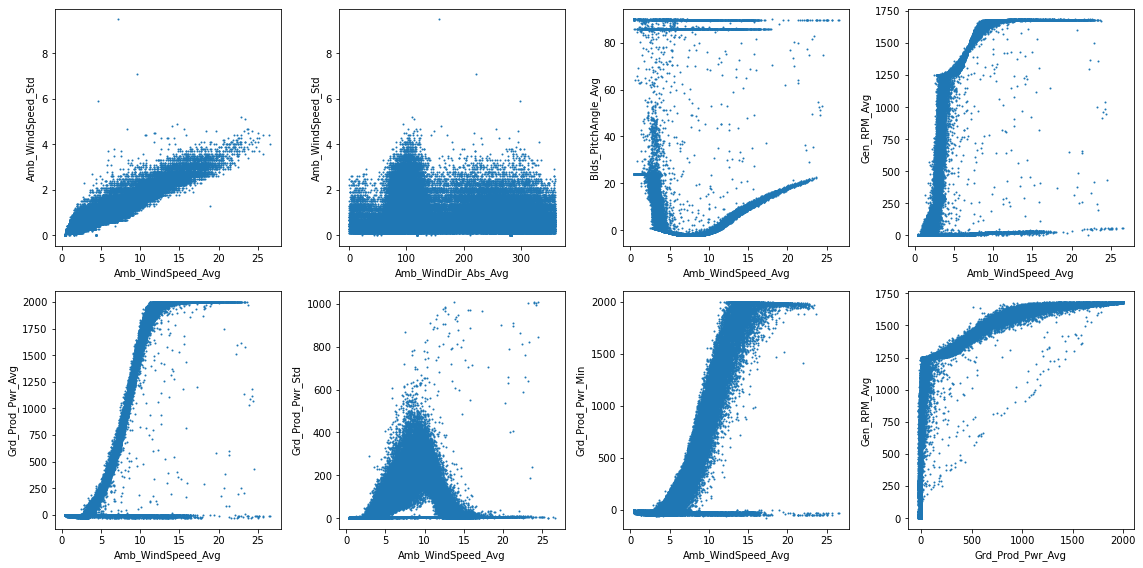

In [35]:
plt.rc('font', size=10) 
fig3 = plt.figure(figsize = (16,8))
fig3.add_subplot(2,4,1)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,2)
plt.plot(dataset.Amb_WindDir_Abs_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindDir_Abs_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,3)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Blds_PitchAngle_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Blds_PitchAngle_Avg')
fig3.add_subplot(2,4,4)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Gen_RPM_Avg')
fig3.add_subplot(2,4,5)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
fig3.add_subplot(2,4,6)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Std')
fig3.add_subplot(2,4,7)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Min[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Min')
fig3.add_subplot(2,4,8)
plt.plot(dataset.Grd_Prod_Pwr_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Grd_Prod_Pwr_Avg')
plt.ylabel('Gen_RPM_Avg')


plt.tight_layout()             
plt.show()

In [36]:
T01mask = dataset.Turbine_ID == 'T11'

MaxPowerMask = dataset.Grd_Prod_Pwr_Max >= 1
MinPowerMask = dataset.Grd_Prod_Pwr_Min <= 1
MinRPMMask = dataset.Gen_RPM_Min >= 1150
MaxRPMMask = dataset.Gen_RPM_Max >= 1250

OperationalMask = MinRPMMask & ~MinPowerMask
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

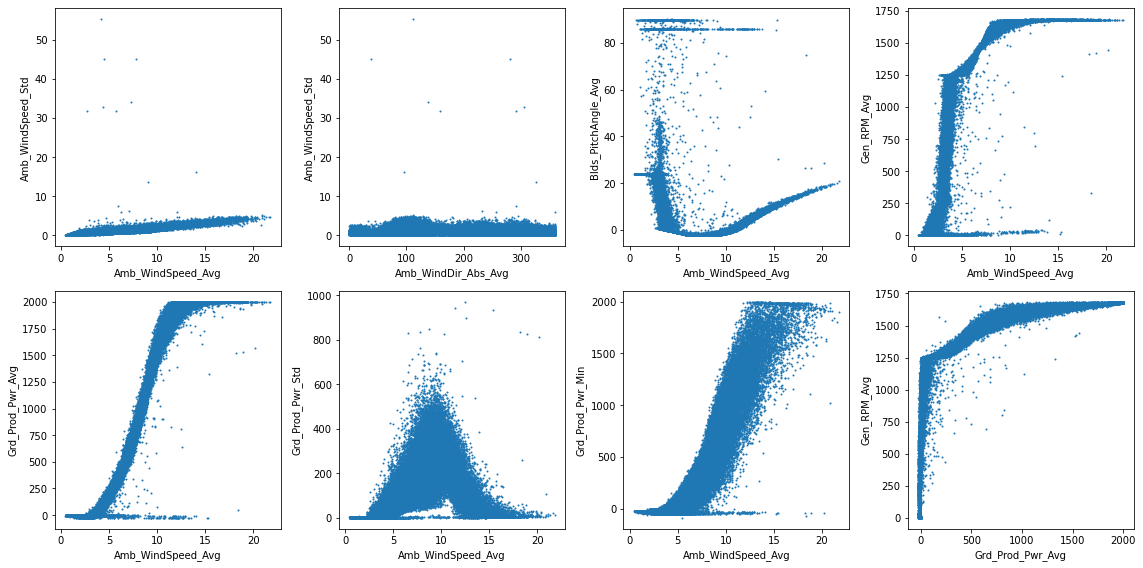

In [37]:
plt.rc('font', size=10) 
fig3 = plt.figure(figsize = (16,8))
fig3.add_subplot(2,4,1)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,2)
plt.plot(dataset.Amb_WindDir_Abs_Avg[T01mask],dataset.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindDir_Abs_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,3)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Blds_PitchAngle_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Blds_PitchAngle_Avg')
fig3.add_subplot(2,4,4)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Gen_RPM_Avg')
fig3.add_subplot(2,4,5)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
fig3.add_subplot(2,4,6)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Std')
fig3.add_subplot(2,4,7)
plt.plot(dataset.Amb_WindSpeed_Avg[T01mask],dataset.Grd_Prod_Pwr_Min[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Min')
fig3.add_subplot(2,4,8)
plt.plot(dataset.Grd_Prod_Pwr_Avg[T01mask],dataset.Gen_RPM_Avg[T01mask],'.',markersize = 2)
plt.xlabel('Grd_Prod_Pwr_Avg')
plt.ylabel('Gen_RPM_Avg')


plt.tight_layout()             
plt.show()

In [38]:
TurbineOK = dataset.Status_Flag==0
TurbineTransient = dataset.Status_Flag == 1
TurbineIdling = dataset.Status_Flag == 2

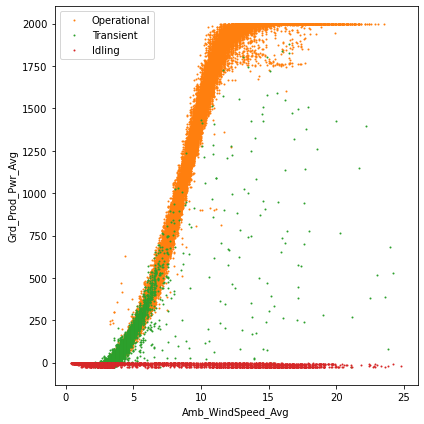

In [39]:
T01mask = dataset.Turbine_ID == 'T01'
fig4 = plt.figure(figsize = (6,6))
plt.plot(dataset.Amb_WindSpeed_Avg[TurbineOK & T01mask],dataset.Grd_Prod_Pwr_Avg[TurbineOK & T01mask],'.',markersize = 2, color = 'C1')
plt.plot(dataset.Amb_WindSpeed_Avg[TurbineTransient & T01mask],dataset.Grd_Prod_Pwr_Avg[TurbineTransient & T01mask],'.',markersize = 2, color = 'C2')
plt.plot(dataset.Amb_WindSpeed_Avg[TurbineIdling & T01mask],dataset.Grd_Prod_Pwr_Avg[TurbineIdling & T01mask],'.',markersize = 2, color = 'C3')
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
plt.legend(['Operational','Transient','Idling'])
plt.tight_layout()             
plt.show()